In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats

In [2]:
#creating database connection
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query("SELECT * from summary_table", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,209.32,1015032.27,21.062810,0.976890,1.266830
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144719.92,1015032.27,21.062810,0.976890,1.266830
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
4,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493


## Exploratory Data Analysis
Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

In this phase of EDA, we will analyze the resultanat table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies and ensure data quality before proceeding with further analysis.

In [3]:
#summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,12489.0,9.672999e+03,17519.491679,2.00,3960.000000,4425.000000,9552.000000,2.013590e+05
Brand,12489.0,1.884756e+04,12524.982470,58.00,6919.000000,19693.000000,25827.000000,9.063100e+04
PurchasePrice,12489.0,2.489222e+01,103.582221,0.36,7.140000,10.800000,20.430000,5.681810e+03
ActualPrice,12489.0,3.660119e+01,141.237886,0.49,10.990000,16.990000,29.990000,7.499990e+03
Volume,12489.0,8.382948e+02,642.695329,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,12489.0,2.946748e+03,10618.653774,1.00,36.000000,240.000000,1805.000000,3.376600e+05
TotalPurchaseDollars,12489.0,2.840181e+04,120334.186143,0.71,472.860000,3545.640000,19227.600000,3.811252e+06
TotalSalesQuantity,12489.0,2.886526e+03,10481.304555,0.00,32.000000,238.000000,1737.000000,3.349390e+05
TotalSalesDollars,12489.0,4.004899e+04,163562.626925,0.00,782.130000,5124.790000,26505.120000,5.101920e+06
TotalSalesPrice,12489.0,1.765005e+04,42869.130243,0.00,321.930000,2776.400000,14819.260000,6.728193e+05


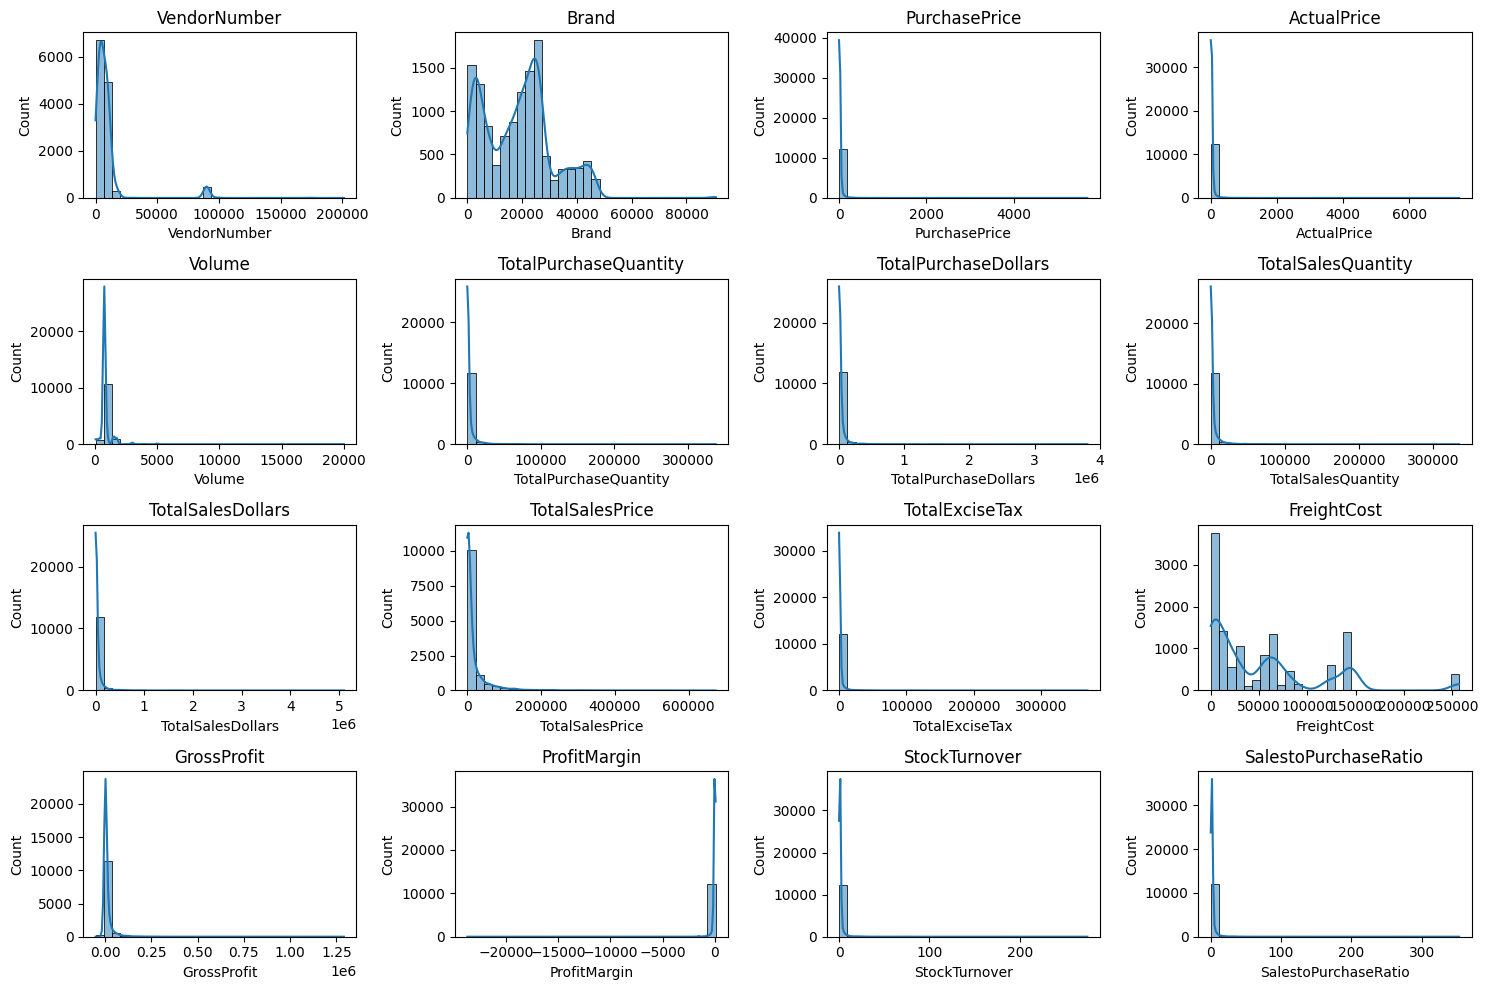

In [4]:
#Distribution plots for numerical columns
num_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

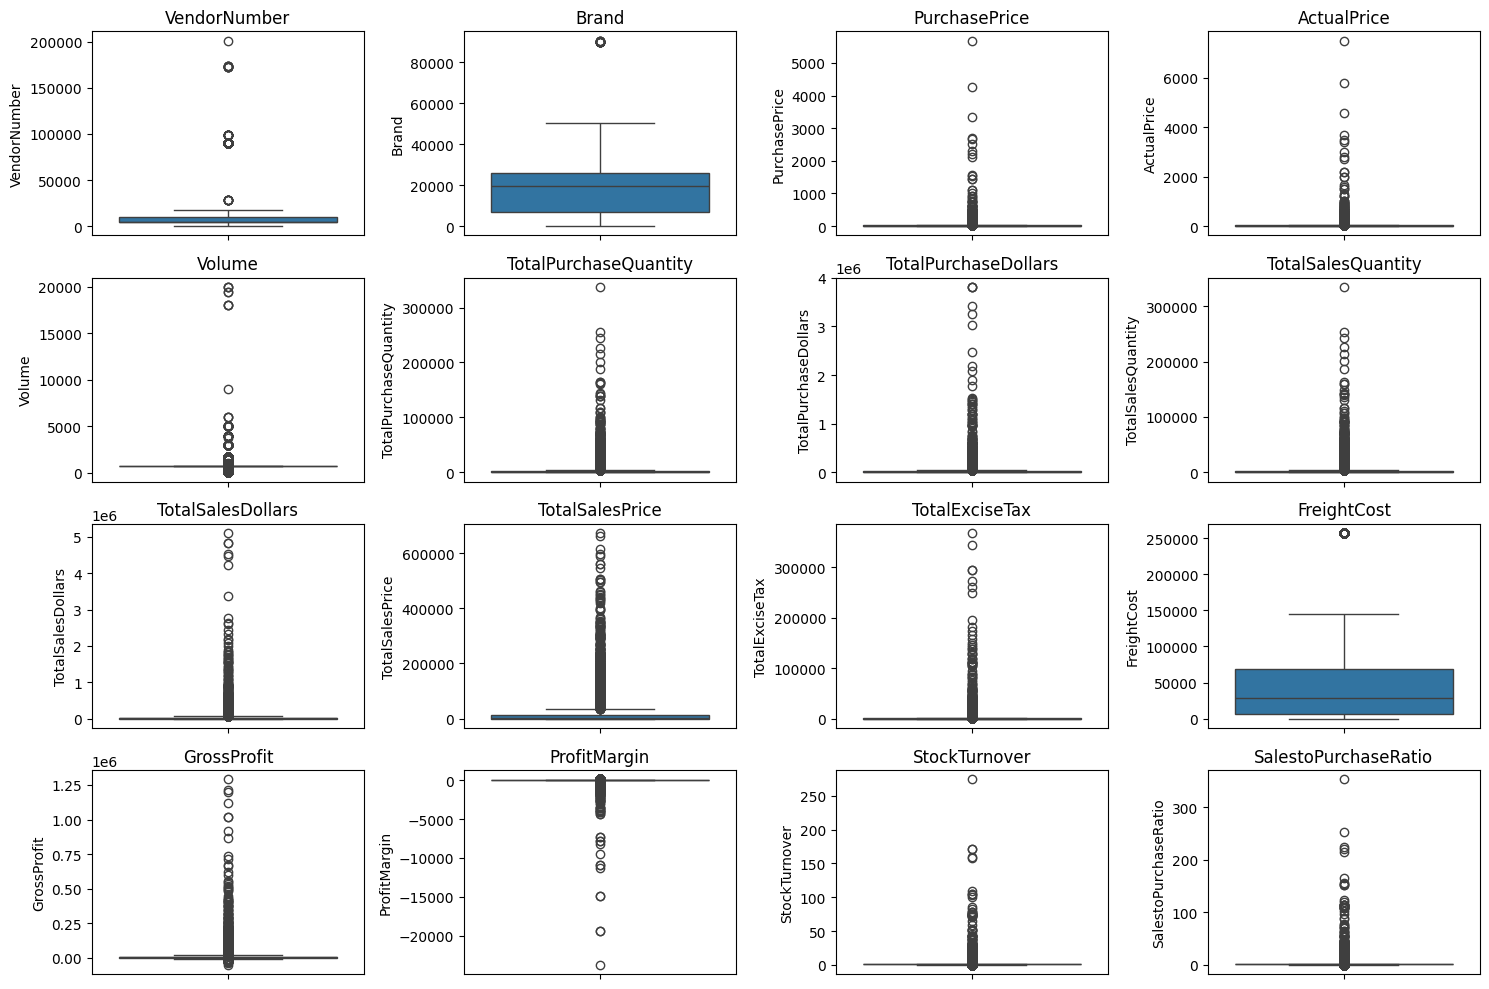

In [5]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Summary Statistics Insights:
Negative & zero values:
Gross Profit: Min value is -52,002.78, indicating losses.Some products or transactions may be selling at loss due to high costs or selling at discounts lower than the purchase price.
Profit Margin: Has a min of -infinity, which suggests cases where revenue is zero or even lower than costs.
Total Sales Quantity & Sales Dollars: Min values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.
### Outliers Indicated by High Standard Deviations:
Purchase & Actual Prices: The max values(5,681.81 & 7,499.99) are slightly higher than the mean(24.39 & 35.64), indicating potential premium products.
Freight Costs: Huge variation, from 0.09 to 257,032.07, suggests logistic inefficiencies or bulk shipments.
Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [6]:
#lets filter out the data by removing inconsistencies

df = pd.read_sql_query("""SELECT * FROM summary_table
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""", conn)

In [7]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,209.32,1015032.27,21.062810,0.976890,1.266830
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144719.92,1015032.27,21.062810,0.976890,1.266830
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
4,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493


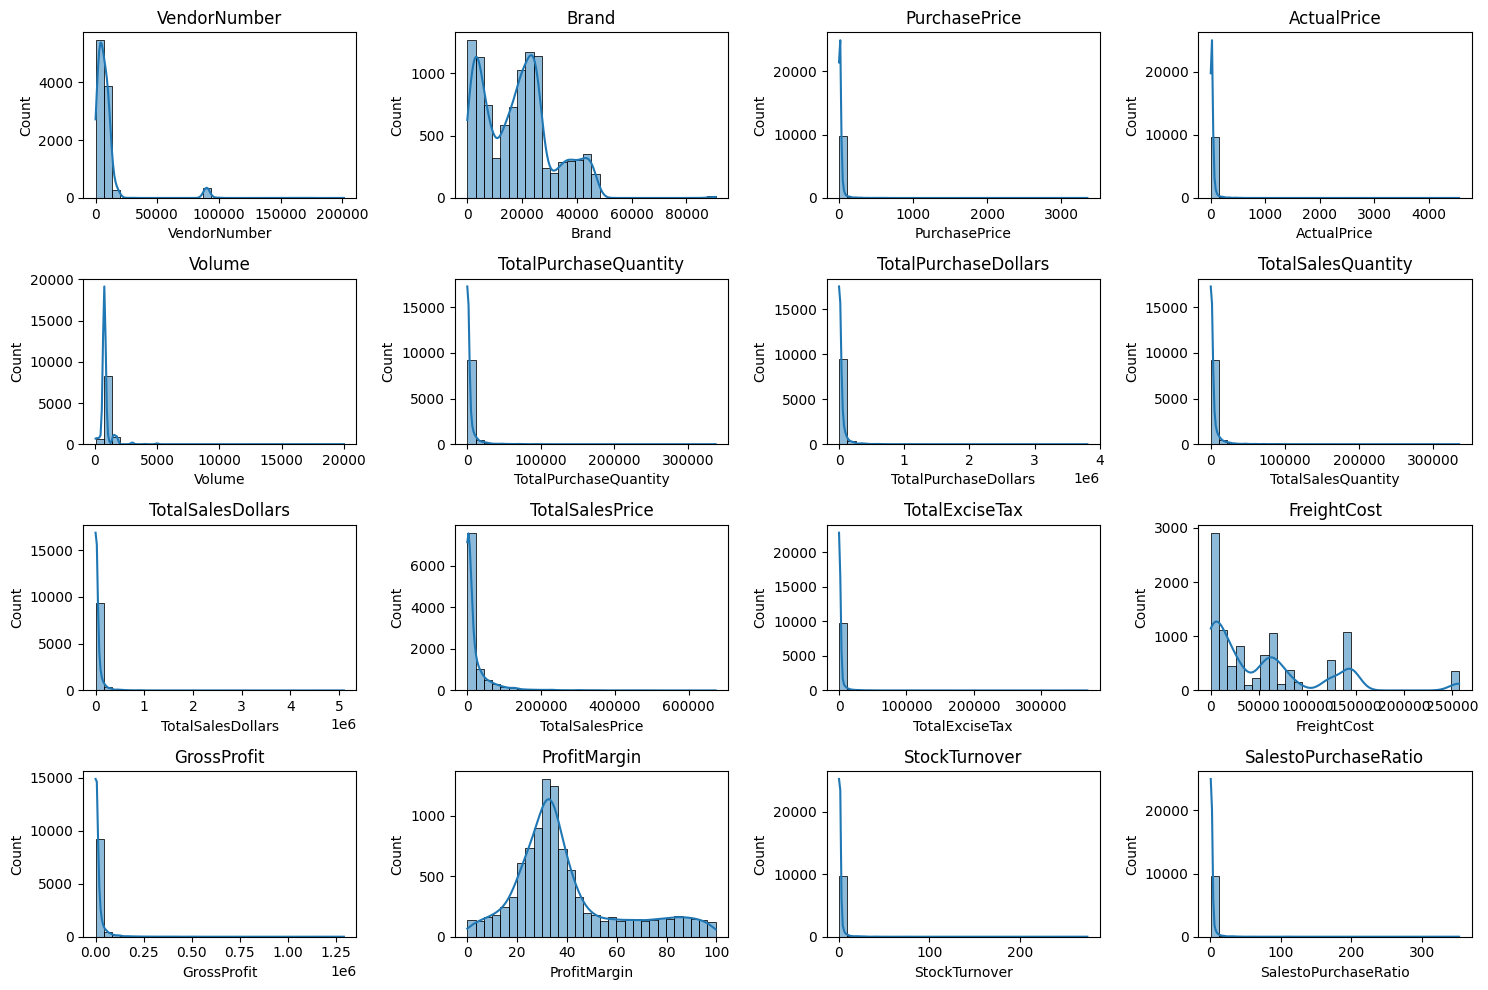

In [8]:
num_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

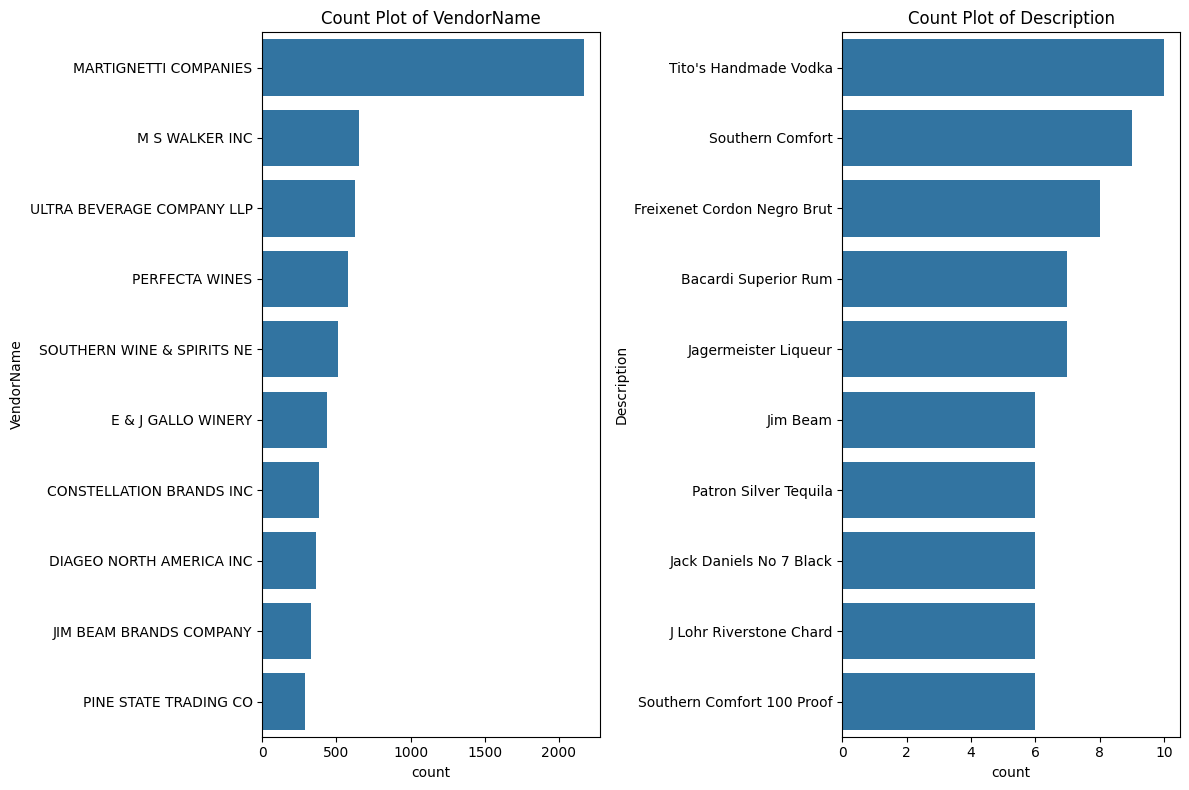

In [9]:
#count plots for categorical columns
cat_cols = ['VendorName', 'Description']

plt.figure(figsize=(12,8))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y = df[col],order = df[col].value_counts().index[:10]) #top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

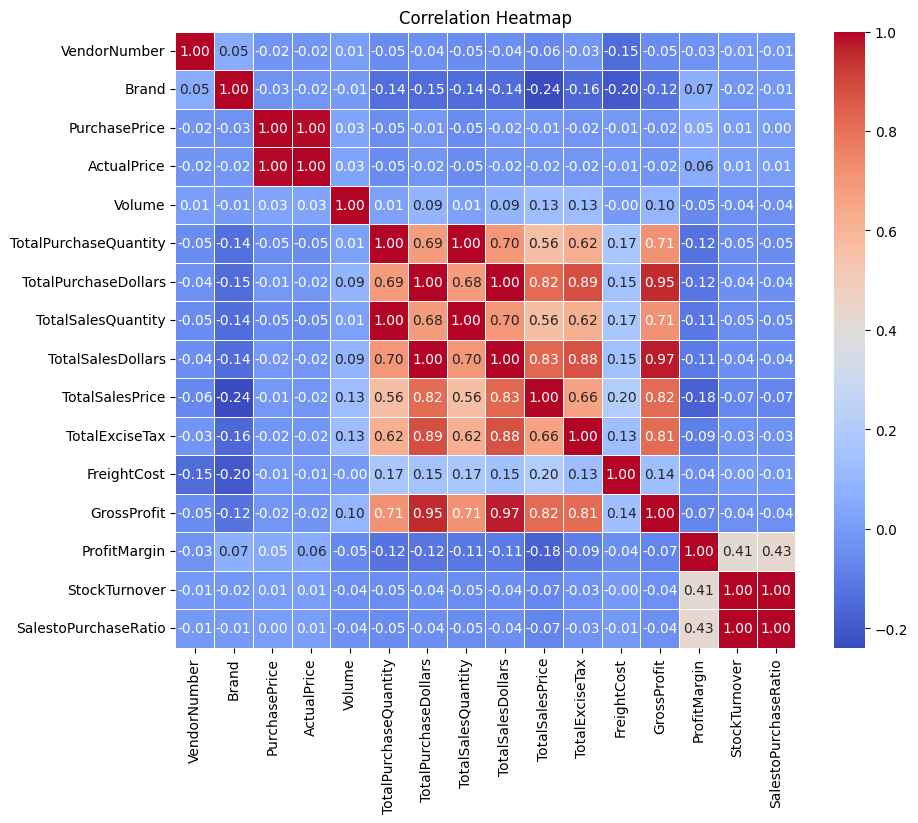

In [10]:
#Correlation Heatmap

plt.figure(figsize = (10,8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Correlation insights
PurchasePrice has weak correlation with TotalSalesDollars(-0.012) and GrossProfit (-0.016) suggesting that price variations do not significantly impact sales revenue or profit.

Strong correlation between total purchase quantity and total sales quantity (0.999) confirming efficient inventory turnover.

Negative correlation between profit margin and total sales price (-0.179) suggest that as sales price increases margin decreases possibly due to competitive pricing pressures.

Stock turnover has weak negative correlations with both gross profit (- 0.038) and profit margin (- 0.055) indicating that faster turn over does not necessarily result in higher profitability.

### Data Analysis
Identifying Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [11]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [12]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [13]:
low_sales_threshold

np.float64(613.0259999999998)

In [14]:
high_margin_threshold

np.float64(65.04347864338617)

In [15]:

#filter brands with low sales but high profit margins

target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins: ")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins: 


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
4817,Merriam Cab Franc Windacre V,594.83,80.523847
3479,Harthill Farms Cab Svgn,595.03,89.956809
5530,Philippe Herard Bl de Blanc,607.24,71.174494
4616,Malibu Cosmo Light RTD,610.59,66.537284


In [16]:
# for better visualzation
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

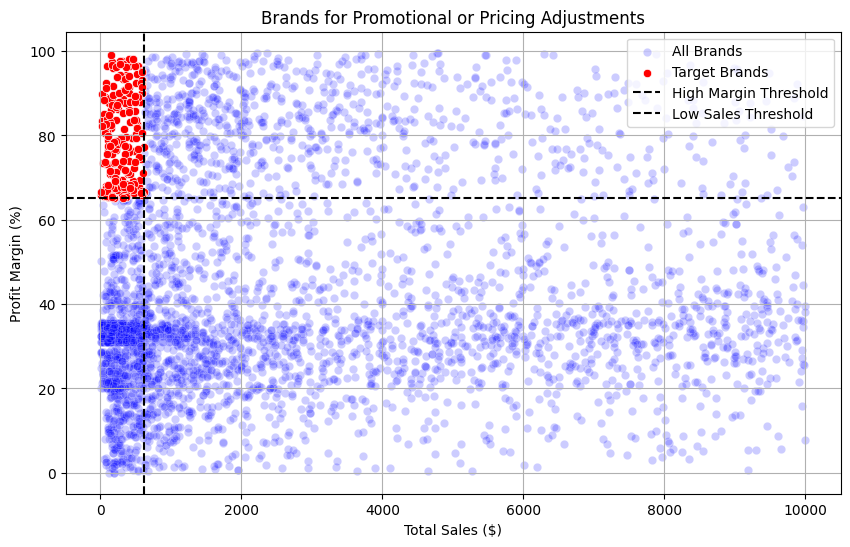

In [17]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=brand_performance, x="TotalSalesDollars", y="ProfitMargin", color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x="TotalSalesDollars", y="ProfitMargin", color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color="black", label = "High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color="black", label = "Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# top vendors and Brands by sales performance

top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
MARTIGNETTI COMPANIES         78660718.72
DIAGEO NORTH AMERICA INC      67990099.42
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [19]:
top_brands

Description
Tito's Handmade Vodka      14799315.16
Jack Daniels No 7 Black     7964746.76
Grey Goose Vodka            7209608.06
Capt Morgan Spiced Rum      6356320.62
Absolut 80 Proof            6244752.03
Jameson Irish Whiskey       5715759.69
Ketel One Vodka             5070083.56
Baileys Irish Cream         4150122.07
Kahlua                      3604858.66
Tanqueray                   3456697.90
Name: TotalSalesDollars, dtype: float64

In [20]:
# to get dollars value more readable
    
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_00:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [21]:
top_brands.apply(lambda x : format_dollars(x))

Description
Tito's Handmade Vodka      14.80M
Jack Daniels No 7 Black     7.96M
Grey Goose Vodka            7.21M
Capt Morgan Spiced Rum      6.36M
Absolut 80 Proof            6.24M
Jameson Irish Whiskey       5.72M
Ketel One Vodka             5.07M
Baileys Irish Cream         4.15M
Kahlua                      3.60M
Tanqueray                   3.46M
Name: TotalSalesDollars, dtype: object

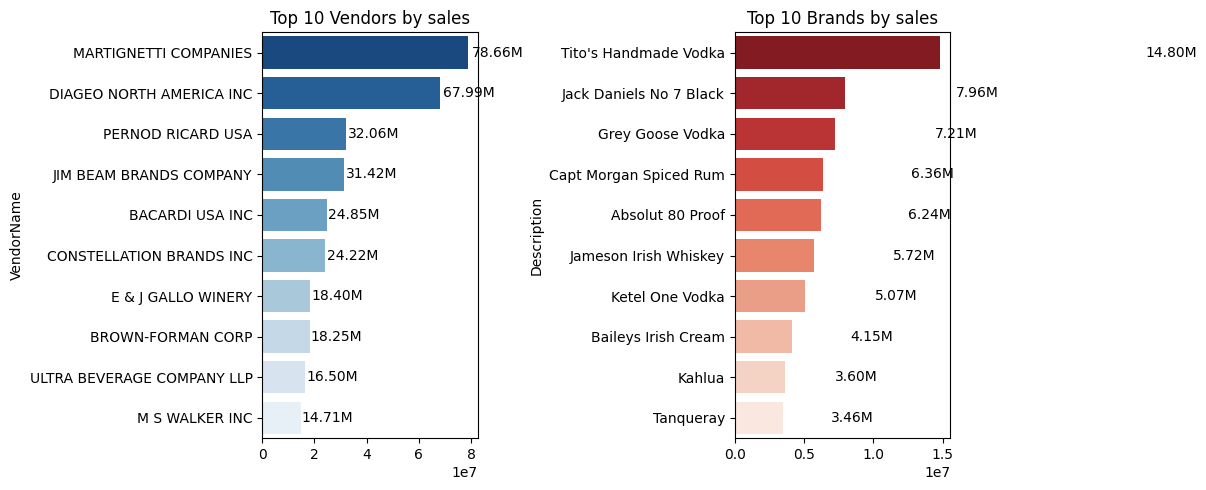

In [22]:
plt.figure(figsize=(15,5))

#plot for top vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y = top_vendors.index, x=top_vendors.values, palette = "Blues_r")
plt.title("Top 10 Vendors by sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height() / 2,
            format_dollars(bar.get_width()),
            ha = 'left', va = 'center', fontsize=10, color='black')
            
#plot for top brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y = top_brands.index.astype(str), x=top_brands.values, palette = "Reds_r")
plt.title("Top 10 Brands by sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() + 0.02),
            bar.get_y() + bar.get_height() / 2,
            format_dollars(bar.get_width()),
            ha = 'left', va = 'center', fontsize=10, color='black')
            
plt.tight_layout()
plt.show()


In [23]:
### Q Which vendors contribute the most to toal purchase dollars?
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

vendor_performance.shape

(119, 4)

In [24]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100


In [25]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)


In [26]:
#Display top 10 vendors

top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
57,MARTIGNETTI COMPANIES,51.00M,27.66M,78.66M,15.11
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,14.84
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.07
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,6.96
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.17
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.53
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,3.92
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.58
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.31
53,M S WALKER INC,9.76M,4.94M,14.71M,2.89


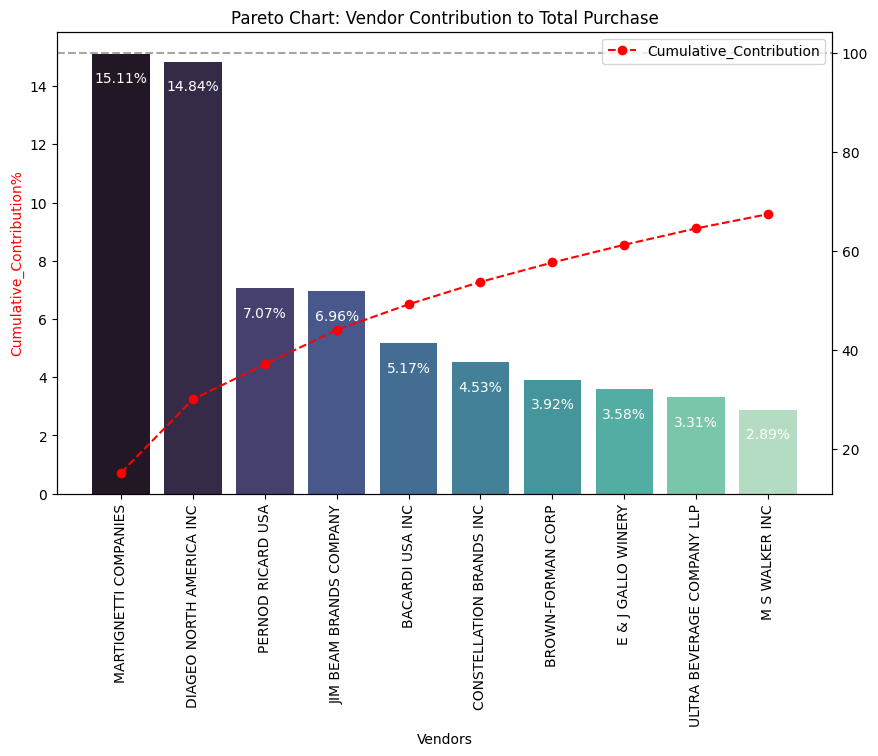

In [27]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum() 

fig, ax1 = plt.subplots(figsize = (10,6))

#Bar plot for purchase contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')
    
#line plot for cumulative contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed',label='Cumulative_Contribution')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('PurchaseContribution%', color='blue')
ax1.set_ylabel('Cumulative_Contribution%', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchase')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

In [28]:
## Q How much of total procurement is dependent on the top vendors?
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 67.38 %


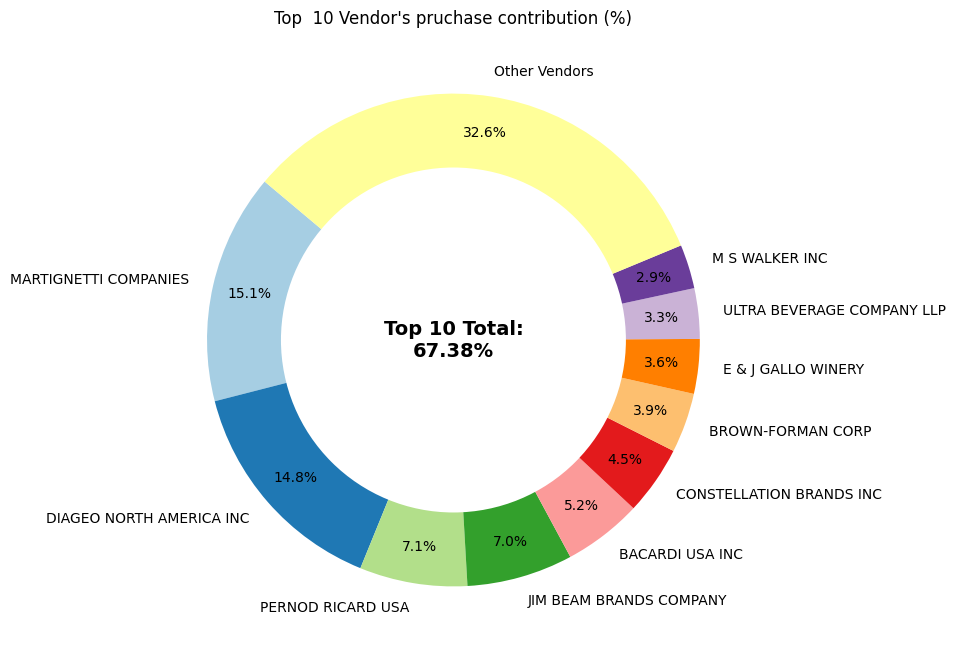

In [29]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution =100-total_contribution

#Append 'other vendors' category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

#donut chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

#Draw a white circle in the centre to create a donut effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

#Add total contribution annotation in the centre
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')
plt.title("Top  10 Vendor's pruchase contribution (%)")
plt.show()

In [30]:
### Q Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,209.32,1015032.27,21.062810,0.976890,1.266830,23.19
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144719.92,1015032.27,21.062810,0.976890,1.266830,23.19
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
4,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17


In [31]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels={'Small', 'Medium', 'Large'})
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,209.32,1015032.27,21.062810,0.976890,1.266830,23.19,Large
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144719.92,1015032.27,21.062810,0.976890,1.266830,23.19,Large
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large
4,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large


In [32]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()


,UnitPurchasePrice
OrderSize,
Small,40.756171
Medium,15.588058
Large,10.873970


- Vendors buying in bulk (Large order size) get the lowest unit price, meaning higher margins, if they can manage inventory efficiently.
- This suggests that bulk pricing startegies successfully encourages vendors to purchase in large volumes, leading to higher overall sales despite lower pre-unit revenue

In [33]:
## Q Which vendors have low inventory turnover, indicating excess stock and slow-moving packages?
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values(by='StockTurnover').head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [34]:
## Q How much capital is locked in unsold inventory per vendor and which vendors contribute the most to it?
df['UnsoldInventoryVlaue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print("Total Unsold Capital: ", format_dollars(df['UnsoldInventoryVlaue'].sum()))

Total Unsold Capital:  2.55M


In [35]:
#Aggregate capital locked per vendor
invent_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryVlaue'].sum().reset_index()

#sort values with the highest locked capital
invent_value_per_vendor = invent_value_per_vendor.sort_values(by='UnsoldInventoryVlaue', ascending=False)
invent_value_per_vendor['UnsoldInventoryVlaue'] = invent_value_per_vendor['UnsoldInventoryVlaue'].apply(format_dollars)
invent_value_per_vendor.head(10)

,VendorName,UnsoldInventoryVlaue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


In [36]:
## Q What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [37]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]["ProfitMargin"].dropna()

In [38]:
top_vendors

0       25.297693
1       21.062810
2       21.062810
3       24.675786
4       27.139908
          ...    
4004    79.684817
4197    85.782102
5482    93.085860
5687    95.012530
5847    94.271857
Name: ProfitMargin, Length: 2494, dtype: float64

In [39]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1)/ np.sqrt(len(data)) # standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical + std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (29.63, 33.98), Mean: 31.81
Low Vendors 95% CI: (40.09, 45.04), Mean: 42.57


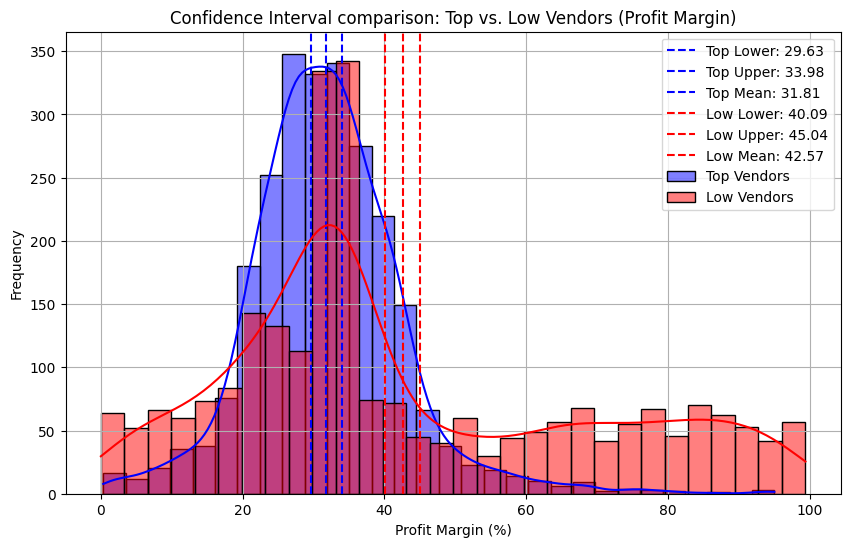

In [40]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)


print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(10,6))

#Top vendors plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

#Low vendors plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {low_mean:.2f}")

#Finalize plot
plt.title("Confidence Interval comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval for low-performing vendors (40.09% to 45.04%) is significantly higher than that of top-performing vendors(29.63% to 33.98%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potential due to premium pricing or lower operational costs.
For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing or improved distribution startegies.
- Is there a significant difference in profit margins between top-performing and low-performing vendors?
### Hypothesis:

H0: There is no significant defference in the mean profit margins of top-performing and low-performing vendors.

H1: The mean profit margin of top-performing and low-performing vendors are significantly different.

In [42]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold] ["ProfitMargin"].dropna()
low_vendors = df[df['TotalSalesDollars'] >= low_threshold] ["ProfitMargin"].dropna()

#Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

#print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top-performing and low-performing vendors")
else:
    print("Fail to Reject H0: No significant difference in profit margins")

T-Statistic: -21.2603, P-Value: 0.0000
Reject H0: There is a significant difference in profit margins between top-performing and low-performing vendors
